# Machine Learning Training/Workshop
### 06/29/2022

This workshop focuses on classification, arguably one of the most important machine learning tasks. 

This workshop illustrates a whole machine learning workflow purpose, emphasizing key concepts and principles that carry over to all types of ML workL, such as:
- Feature engineering
- Fundamental evaluation metrics (precision, recall, F1, TPR, FPR, AUC ROC)
- Cross Validation

Contents:
1. Data exploration/cleaning
2. Feature Engineering
3. Model training
4. Model evaluation
5. Cross validation

# 1. Look at data
- Inconsistent data types and values
- Missing values
- Cleaning

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
csv = "data/telco-customer-churn-data.csv"

df = pd.read_csv(csv)
len(df)

7043

In [3]:
df.head().T
# df.sample(5)

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data cleaning (1)

- Column "TotalCharges" should be of numeric type, yet its type is "Object".
- This is because Column "TotalCharges" has missing values stored as " ", which are (incorrectly) interpreted as empty strings. 
    - The whole column is type-casted to string (unintended!), even though most of its values are floats.
- We fix this as follows. Also, fill in the missing values with 0.
    - Can also fill in with mean, median, etc. of this column.

In [5]:
df[df['TotalCharges'] == " "][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

## Data cleaning (2)

- This step cleans up strings: be it a column name or a value.
- It replaces empty space " " by underscore "_".
- It converts all letters to lower cases.
(some good reasons for this!)


In [7]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")

string_columns = list(df.dtypes[df.dtypes == "object"].index)
for col in string_columns:
    df[col] = df[col].str.lower()
    df[col] = df[col].str.replace(" ", "_")

In [8]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


# 2. Prepare data for model training

## 2.1 Target variable
- The target variable is "churn". Currently it takes "yes/no" as values.
- We convert these to a binary 1/0

In [9]:
df['churn'].value_counts()

no     5174
yes    1869
Name: churn, dtype: int64

In [10]:
df['churn'] = (df['churn'] == 'yes').astype(int)
df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

## 2.2 Split dataset to {training + validation + test} sets
- You are allowed to use Training + Validation sets 
    - Train a model with the training set
    - Validate model (e.g., of two models which one is better; among different model parameters which ones seem best; etc.)
- Report model performance on Test set as a proxy to unseen/new data
    - Don't use Test set in training (or validation)!

In [11]:
from sklearn.model_selection import train_test_split

#### Say set Train + Validation  = 80%, Test 20%,

In [12]:
TRAIN_RATIO, VALID_RATIO, TEST_RATIO = 0.6, 0.2, 0.2

df_train_full, df_test = train_test_split(df, test_size=TEST_RATIO, random_state=12)
# Further split into Traininng and Validation sets
df_train, df_valid = train_test_split(df_train_full, test_size=VALID_RATIO/(TRAIN_RATIO + VALID_RATIO), random_state=123)

print("Train size:", len(df_train))
print("Validation size:", len(df_valid))
print("Test size:", len(df_test))
print("Train : Valid : Test = ", f"{len(df_train)/len(df):.2f} : {len(df_valid)/len(df):.2f} : {len(df_test)/len(df):.2f}")

Train size: 4225
Validation size: 1409
Test size: 1409
Train : Valid : Test =  0.60 : 0.20 : 0.20


## 2.3 Set aside target values (the "y")

In [13]:
y_train = df_train['churn'].values 
y_valid = df_valid['churn'].values 
y_test = df_test['churn'].values

# To avoid incidentally using the "y" values as training features, remove the targets from training data
del df_train['churn']
del df_valid['churn']

## 2.4 Feature Engineering (the "X")

### Select columns to for feature engineering
For simplicity, we simply take all columns (except "customerid")

In [14]:
#df_train.dtypes

In [15]:
categorical = [
    'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 
    'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 
    'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
    'contract', 'paperlessbilling', 'paymentmethod'
    ]
    
numerical = ['tenure', 'monthlycharges', 'totalcharges']

#### Vectorize the dataframe to a pure numeric matrix X 

In [16]:
from sklearn.feature_extraction import DictVectorizer

In [17]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
#train_dict[:1]

In [18]:
dict_vectorizer = DictVectorizer(sparse=False)
dict_vectorizer.fit(train_dict)

X_train = dict_vectorizer.transform(train_dict)

#### Let's take a close look at the feature matrix X_train

In [19]:
print(f"Matrix of shape {X_train.shape[0]} by {X_train.shape[1]}")

print(X_train)

Matrix of shape 4225 by 45
[[1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.00000e+00
  9.08500e+01]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 4.10000e+01
  7.75600e+02]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 4.10000e+01
  3.64505e+03]
 ...
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 7.00000e+00
  5.21350e+02]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 6.30000e+01
  1.32815e+03]
 [0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 5.10000e+01
  4.55485e+03]]


In [20]:
#print(len(df_train))
#print(len(dict_vectorizer.feature_names_))
#print("Features after vectorization:")
#print(dict_vectorizer.feature_names_)

#### Let's inspect X_train in a more verbose way

In [21]:
pd.DataFrame(X_train, columns=dict_vectorizer.feature_names_)

,contract=month-to-month,contract=one_year,contract=two_year,dependents=no,dependents=yes,deviceprotection=no,deviceprotection=no_internet_service,deviceprotection=yes,gender=female,gender=male,...,streamingmovies=no_internet_service,streamingmovies=yes,streamingtv=no,streamingtv=no_internet_service,streamingtv=yes,techsupport=no,techsupport=no_internet_service,techsupport=yes,tenure,totalcharges
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,90.85
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,41.0,775.60
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,41.0,3645.05
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,72.0,1778.70
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,47.0,2813.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,281.00
4221,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,24.45
4222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0,521.35
4223,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,63.0,1328.15


# 3. Model training
With {X_train, y_train}, it is enough to train a model:
What is trainining?
- A model is analogous to a mathematical function: $y = Model(input = X)$
- Model learns from examples (X_train, y_train)
- Learning means reducing differences between y_train and y_pred, where y_pred = Model.predict(X_train). 


In [22]:
from sklearn.linear_model import LogisticRegression

## Here we use a simple binary classfication model: Logistic Regression
- Oxymoronic name: it's not for regression but for classification
- Linear regression disguised 

### Set-up: 

- Input is an observation featurized as a vector $\vec{x} = [x_{1}, x_{2}, \cdots, x_{i}, \cdots]$
    -   Feature vector size = number of features
- Prediction is whether its label is Class 1 or Class 0
- Instead of predicting a hard 1/0, predict the probablity $\hat{p}$ of being 1 or 0 
    - Predicting a probablity $\hat{p} \in [0, 1]$ is a soft version of predicting either 0 or 1 (hard version). 
    - It has a probablistic confidence intepretation.

Proba | Category 
----- | ----- 
$1 - p$ | Class 0
$p$ | Class 1

- If $p \geq 1 - p$, i.e. $p \geq 1/2$, it's more likely of Class 1.
- If $p < 1 - p$, i.e. $p < 1/2$, it's more likely of Class 0.

### Prediction: 
Compute
$$
\begin{align*}
\log \frac{\hat{p}}{1-\hat{p}} 
&= w_{0} + w_{1} x_{1} + w_{2} x_{2} + \cdots + w_{i} x_{i} + \cdots\\
&= \vec{w}^{\intercal}\vec{x}
\end{align*}
$$
That is, 
$$
\begin{align*}
\frac{\hat{p}}{1-\hat{p}} = e^{\vec{w}^{\intercal}\vec{x}}
\Longrightarrow\ 
\boxed{\hat{p} 
= \frac{1}{1 + e^{- \vec{w}^{\intercal}\vec{x}}} = \mathrm{Sigmoid}\left(\vec{w}^{\intercal}\vec{x}\right)}
\end{align*}
$$

Where do these $\vec{w} = [w_{1}, w_{2}, \cdots, w_{i}, \cdots]$ come from? 

Machine learning: the model learns these weights from labeled training dataset. 

## 3.1 Train a model; evaluate its train, validation, test accuracies

In [23]:
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=1234)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1234, solver='liblinear')

In [24]:
y_train_pred = model.predict_proba(X_train)[:, 1]
y_train_pred

array([0.79873796, 0.03110264, 0.33131158, ..., 0.66833635, 0.00289883,
       0.24169955])

### To summarize what we have done (train a model; use model to make predictions), organize the code into two functions:
- train()
- predict()

In [25]:
def train(df, y, features=None, C=1.0):
    if features is None:
        features = categorical + numerical
    
    cat = df[features].to_dict(orient='records')

    dict_vectorizer = DictVectorizer()
    dict_vectorizer.fit(cat)

    X = dict_vectorizer.transform(cat)

    model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=1234, C=C)
    model.fit(X, y)

    return dict_vectorizer, model

In [26]:
def predict(df, dict_vectorizer, model, features=None):
    if features is None:
        features = categorical + numerical
    
    cat = df[features].to_dict(orient='records')
    
    X = dict_vectorizer.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

### How accurate?

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
dict_vectorizer, model = train(df_train, y_train)

# Training accuracy
y_train_pred = predict(df_train, dict_vectorizer, model)
accu_train = accuracy_score(y_train, y_train_pred>=0.5)

# Validation accuracy
y_valid_pred = predict(df_valid, dict_vectorizer, model)
accu_valid = accuracy_score(y_valid, y_valid_pred>=0.5)

# Test accuracy
y_test_pred = predict(df_test, dict_vectorizer, model)
accu_test = accuracy_score(y_test, y_test_pred>=0.5)

In [29]:
print("Accuracy:")
print(f"Training: {accu_train:.4f}")
print(f"Validation: {accu_valid:.4f}")
print(f"Test: {accu_test:.4f}")

Accuracy:
Training: 0.8026
Validation: 0.8148
Test: 0.7991


### Model serving

In [30]:
test_idx = 123
customer = df_test.iloc[[test_idx]]
print("Customer:\n", customer.to_dict(orient='records'))

print("\nPredicted proba of being Class 1:\n", predict(customer, dict_vectorizer, model))
print("\nTruth: y =", y_test[test_idx])

Customer:
 [{'customerid': '2038-yseze', 'gender': 'female', 'seniorcitizen': 0, 'partner': 'no', 'dependents': 'no', 'tenure': 29, 'phoneservice': 'yes', 'multiplelines': 'yes', 'internetservice': 'dsl', 'onlinesecurity': 'yes', 'onlinebackup': 'yes', 'deviceprotection': 'no', 'techsupport': 'yes', 'streamingtv': 'no', 'streamingmovies': 'no', 'contract': 'month-to-month', 'paperlessbilling': 'no', 'paymentmethod': 'mailed_check', 'monthlycharges': 67.45, 'totalcharges': 1801.1, 'churn': 0}]

Predicted proba of being Class 1:
 [0.05910572]

Truth: y = 0


## 3.2 For comparison, let's also train a smaller model
Train with smaller subset of features

In [31]:
feature_subset = ['contract', 'tenure', 'totalcharges']

dict_vectorizer_small, model_small = train(df_train, y_train, features=feature_subset)

y_train_pred_small = predict(df_train, dict_vectorizer_small, model_small, features=feature_subset)
accu_train_small = accuracy_score(y_train, y_train_pred_small>=0.5)

y_valid_pred_small = predict(df_valid, dict_vectorizer_small, model_small, features=feature_subset)
accu_valid_small = accuracy_score(y_valid, y_valid_pred_small>=0.5)

y_test_pred_small = predict(df_test, dict_vectorizer_small, model_small, features=feature_subset)
accu_test_small = accuracy_score(y_test, y_test_pred_small>=0.5)

print("Accuracy (smaller model):")
print(f"Training: {accu_train_small:.4f}")
print(f"Validation: {accu_valid_small:.4f}")
print(f"Test: {accu_test_small:.4f}")

Accuracy (smaller model):
Training: 0.7723
Validation: 0.7757
Test: 0.7821


# 4. Evaluation

### Purposes:
- How good a model really is, from more angles: accuracy, precision, recall, false-positive rate, ROC-AUC score
- How to know a model is trained with optimal settings (hyper-parameters) 

Two things you should begin questioning:
- Is 80%-ish accuracy (for training, test) good?
    - Answer: not really impressive. Try compare with a baseline model.
- Is validation really being conducted?
    - Answer: somewhat but not fully used. Need to do cross-validation.

## 4.1 Compare with Baseline model and Random model - Accuracy is not the only metric!
- Baseline model: always predict the majority class (here: non-churn or Class 0)

In [32]:
class BaselineModel:
    def __init__(self, majority_cat=0):
        self.cat = 0
    
    def predict_proba(self, X=None, size=None):
        """Param X: matrix of shape (nRows, nFeatures)"""
        p = 0.01 if self.cat == 0 else 0.99
        if X is not None:
            return np.repeat(p, X.shape[0])
        if size is not None :
            return np.repeat(p, size)

    def predict(self, X=None, size=None):
        """Param X: matrix of shape (nRows, nFeatures)"""
        if X is not None:
            return np.repeat(self.cat, X.shape[0])
        if size is not None:
            return np.repeat(self.cat, size)

In [33]:
class RandomModel:
    def __init__(self):
        pass

    def predict_proba(self, X=None, size=None):
        """Param X: matrix of shape (nRows, nFeatures)"""
        if X is not None:
            return np.random.uniform(0, 1, size=X.shape[0])
        if size is not None:
            return np.random.uniform(0, 1, size=size)

    def predict(self, X=None, size=None):
        """Param X: matrix of shape (nRows, nFeatures)"""
        if X is not None:
            y = self.predict_proba(X=X) >= 0.5
        if size is not None:
            y = self.predict_proba(size=size) >= 0.5
        return y.astype(int)

#### As you'll see, even a baseline model can achieve 74% Test accuracy 

In [34]:
model_baseline = BaselineModel(majority_cat=0)

y_train_pred_baseline = model_baseline.predict_proba(size=len(df_train))
y_valid_pred_baseline = model_baseline.predict_proba(size=len(df_valid))
y_test_pred_baseline = model_baseline.predict_proba(size=len(df_test))

print("Accuracy (baseline):")
print(f"Training: {accuracy_score(y_train, y_train_pred_baseline>=0.5):.4f}")
print(f"Validation: {accuracy_score(y_valid, y_valid_pred_baseline>=0.5):.4f}")
print(f"Test: {accuracy_score(y_test, y_test_pred_baseline>=0.5):.4f}")

Accuracy (baseline):
Training: 0.7304
Validation: 0.7417
Test: 0.7402


In [35]:
model_random = RandomModel()

y_train_pred_random = model_random.predict_proba(size=len(df_train))
y_valid_pred_random = model_random.predict_proba(size=len(df_valid))
y_test_pred_random = model_random.predict_proba(size=len(df_test))

print("Accuracy (random):")
print(f"Training: {accuracy_score(y_train, y_train_pred_random>=0.5):.4f}")
print(f"Validation: {accuracy_score(y_valid, y_valid_pred_random>=0.5):.4f}")
print(f"Test: {accuracy_score(y_test, y_test_pred_random>=0.5):.4f}")

Accuracy (random):
Training: 0.4973
Validation: 0.4869
Test: 0.4925


## 4.2 Precision, Recall, F1

For imbalanced classification cases (here, in the churn dataset, churns are only minority, 20%-ish), accuracy can be misleading. 

The quality of a classification model (here, logistic regression classifers) is better measured in terms of Precision and Recall.

- Precision ~ (opposite of) False alarms of churns
- Recall ~ (oppositie of) Missed detection of churns

<table>
<tr>
    <th>Case</th>
    <th>Abbrev</th>
    <th>When</th> 
</tr>

<tr>
    <td>True Negative</td> 
    <td>TN</td> 
    <td>y_pred == 0 & y_true == 0</td>
</tr>

<tr>
    <td>False Negative</td> 
    <td>FN</td> 
    <td>y_pred == 0 & y_true == 1</td>
</tr>

<tr>
    <td>False Positive</td> 
    <td>FP</td> 
    <td>y_pred == 1 & y_true == 0</td>
</tr>

<tr>
    <td>True Positive</td> 
    <td>TP</td> 
    <td>y_pred == 1 & y_true == 1</td>
</tr>

</table>



$$
\begin{align*}
\mathrm{Precision} 
&= \frac{\text{Correct churn predictions}}{\text{Total churn predictions}} =
\frac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FP}}\\ \\
\mathrm{Recall} 
&= \frac{\text{Correct churn predictions}}{\text{Actual churns}} =
\frac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FN}}\\ \\
\mathrm{F1} 
&= 
\frac{2 \cdot \mathrm{Precision} \cdot \mathrm{Recall}}{\mathrm{Precision} + \mathrm{Recall}}
\end{align*}
$$

In [36]:
def get_precision_recall_f1(y_true, y_pred, threshold=0.5):

    max_pred = np.max(y_pred)
    if threshold >= max_pred and max_pred >= 0.5:
        threshold = max_pred

    true_positive = np.sum((y_pred >= threshold) & (y_true == 1))
    false_positive = np.sum((y_pred >= threshold) & (y_true == 0))
    false_negative = np.sum((y_pred < threshold) & (y_true == 1))
    true_negative = np.sum((y_pred < threshold) & (y_true == 0))

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1 = 2 * precision * recall / (precision + recall)
    
    return precision, recall, f1

In [37]:
# Model's validation performance
precision, recall, f1 = get_precision_recall_f1(y_valid, y_valid_pred)
print(f"Model's validation performance:")
print(f"Precision: {precision:.4f}\nRecall: {recall:.4f}\nF1: {f1:.4f}")

print("\n")

# Model's test performance
precision, recall, f1 = get_precision_recall_f1(y_test, y_test_pred)
print(f"Model's test performance:")
print(f"Precision: {precision:.4f}\nRecall: {recall:.4f}\nF1: {f1:.4f}")

Model's validation performance:
Precision: 0.6711
Recall: 0.5549
F1: 0.6075


Model's test performance:
Precision: 0.6326
Recall: 0.5410
F1: 0.5832


In [38]:
# Smaller Model's validation performance
precision, recall, f1 = get_precision_recall_f1(y_valid, y_valid_pred_small)
print(f"Model (small)'s validation performance:")
print(f"Precision: {precision:.4f}\nRecall: {recall:.4f}\nF1: {f1:.4f}")

print("\n")

# Small Model's test performance
precision, recall, f1 = get_precision_recall_f1(y_test, y_test_pred_small)
print(f"Model (small)'s test performance:")
print(f"Precision: {precision:.4f}\nRecall: {recall:.4f}\nF1: {f1:.4f}")

Model (small)'s validation performance:
Precision: 0.5789
Recall: 0.4835
F1: 0.5269


Model (small)'s test performance:
Precision: 0.5908
Recall: 0.5246
F1: 0.5557


In [39]:
# Baseline Model's validation performance
precision, recall, f1 = get_precision_recall_f1(y_valid, y_valid_pred_baseline)
print(f"Model (baseline)'s validation performance:")
print(f"Precision: {precision:.4f}\nRecall: {recall:.4f}\nF1: {f1:.4f}")

print("\n")

# Baseline Model's test performance
precision, recall, f1 = get_precision_recall_f1(y_test, y_test_pred_baseline)
print(f"Model (baseline)'s test performance:")
print(f"Precision: {precision:.4f}\nRecall: {recall:.4f}\nF1: {f1:.4f}")

Model (baseline)'s validation performance:
Precision: nan
Recall: 0.0000
F1: nan


Model (baseline)'s test performance:
Precision: nan
Recall: 0.0000
F1: nan


C:\Users\james\AppData\Local\Temp/ipykernel_3428/3737506007.py:12: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positive / (true_positive + false_positive)


In [40]:
# Random Model's validation performance
precision, recall, f1 = get_precision_recall_f1(y_valid, y_valid_pred_random)
print(f"Model (random)'s validation performance:")
print(f"Precision: {precision:.4f}\nRecall: {recall:.4f}\nF1: {f1:.4f}")

print("\n")

# Random Model's test performance
precision, recall, f1 = get_precision_recall_f1(y_test, y_test_pred_random)
print(f"Model (random)'s test performance:")
print(f"Precision: {precision:.4f}\nRecall: {recall:.4f}\nF1: {f1:.4f}")

Model (random)'s validation performance:
Precision: 0.2395
Recall: 0.4533
F1: 0.3134


Model (random)'s test performance:
Precision: 0.2553
Recall: 0.4973
F1: 0.3373


## 4.3 Threshold: Accuracy, Precision, Recall, F1 are evalued relative to threshold

In [41]:
# Model's validation performance
accu = accuracy_score(y_valid, y_valid_pred>=0.44)
precision, recall, f1 = get_precision_recall_f1(y_valid, y_valid_pred, threshold=0.44)
print(f"Model validation performance:")
print("Acuracy:", f"{accu:.4f}")
print(f"Precision: {precision:.4f}\nRecall: {recall:.4f}\nF1: {f1:.4f}")

Model validation performance:
Acuracy: 0.8020
Precision: 0.6190
Recall: 0.6071
F1: 0.6130


#### Write a function to get a table of {accuracy, precision, recall, F1} versus different thresholds

In [42]:
def get_accuracy_precision_recall_f1_dataframe(y_true, y_pred, n_thresholds=101):
    scores = []
    thresholds = np.linspace(0, 1, n_thresholds)
    for theta in thresholds:
        accu = accuracy_score(y_true, y_pred >= theta)
        precision, recall, f1 = get_precision_recall_f1(y_true, y_pred, theta)
        scores.append([theta, accu, precision, recall, f1])
    df_score = pd.DataFrame(
        scores,
        columns = ['Threshold', 'Accuracy', 'Precision', 'Recall', 'F1'])
    return df_score

In [43]:
model_scores_precision_recall_f1 = get_accuracy_precision_recall_f1_dataframe(y_valid, y_valid_pred)
model_scores_precision_recall_f1

,Threshold,Accuracy,Precision,Recall,F1
0,0.00,0.258339,0.258339,1.000000,0.410603
1,0.01,0.368346,0.289263,0.991758,0.447891
2,0.02,0.430092,0.309957,0.983516,0.471363
3,0.03,0.465578,0.323021,0.975275,0.485304
4,0.04,0.488999,0.332707,0.972527,0.495798
...,...,...,...,...,...
96,0.96,0.741661,1.000000,0.002747,0.005479
97,0.97,0.741661,1.000000,0.002747,0.005479
98,0.98,0.741661,1.000000,0.002747,0.005479
99,0.99,0.741661,1.000000,0.002747,0.005479


In [44]:
from matplotlib import pyplot as plt 
%matplotlib inline

Text(0.5, 1.0, 'Precision, Recall, F1 vs. Threshold')

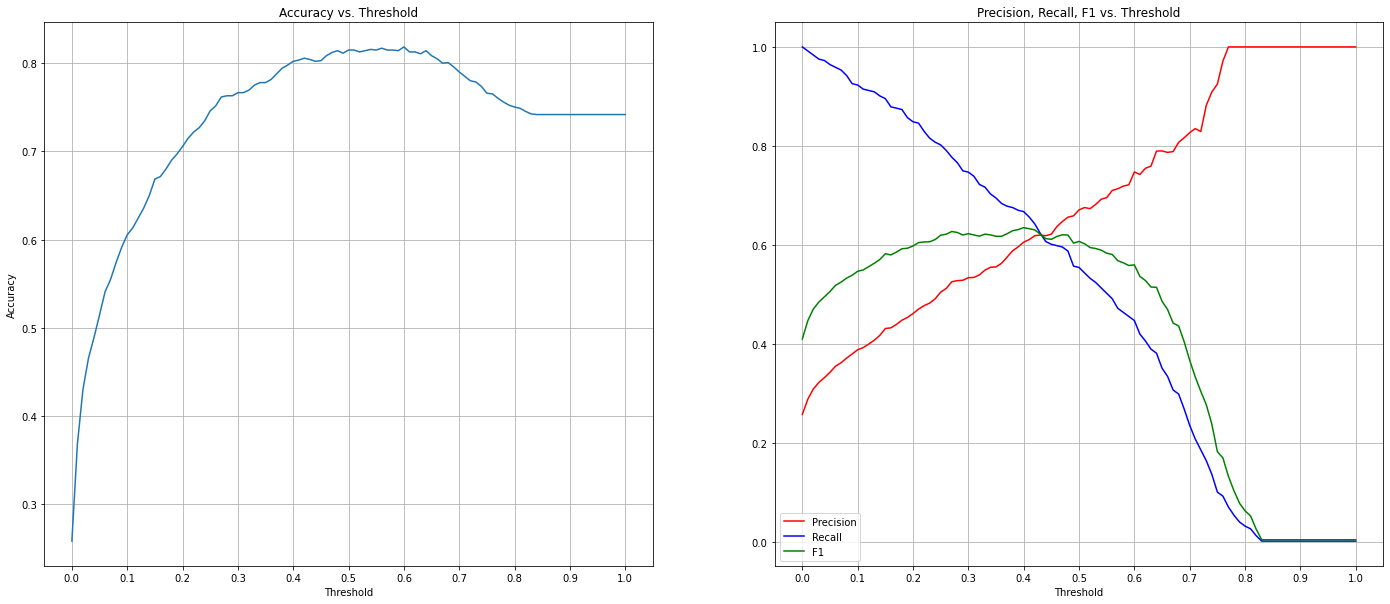

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(24, 10))

x = model_scores_precision_recall_f1['Threshold']
y = model_scores_precision_recall_f1['Accuracy']
ax[0].plot(x, y)
ax[0].grid()
ax[0].set_xticks(np.linspace(0, 1, 11))
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy vs. Threshold')

x = model_scores_precision_recall_f1['Threshold']
y1 = model_scores_precision_recall_f1['Precision']
y2 = model_scores_precision_recall_f1['Recall']
y3 = model_scores_precision_recall_f1['F1']
ax[1].plot(x, y1, 'r', label='Precision')
ax[1].plot(x, y2, 'b', label='Recall')
ax[1].plot(x, y3, 'g', label='F1')
ax[1].grid()
ax[1].legend()
ax[1].set_xticks(np.linspace(0, 1, 11))
ax[1].set_xlabel('Threshold')
ax[1].set_title('Precision, Recall, F1 vs. Threshold')

## 4.4 True Positive Rate, False Positive Rate, ROC and AUC

<table>
<tr>
    <th>Case</th>
    <th>Abbrev</th>
    <th>When</th> 
</tr>

<tr>
    <td>True Negative</td> 
    <td>TN</td> 
    <td>y_pred == 0 & y_true == 0</td>
</tr>

<tr>
    <td>False Negative</td> 
    <td>FN</td> 
    <td>y_pred == 0 & y_true == 1</td>
</tr>

<tr>
    <td>False Positive</td> 
    <td>FP</td> 
    <td>y_pred == 1 & y_true == 0</td>
</tr>

<tr>
    <td>True Positive</td> 
    <td>TP</td> 
    <td>y_pred == 1 & y_true == 1</td>
</tr>

</table>

- False Positive Rate (FPR): fraction of False Positives among all actual negatives
    > $$\mathrm{FPR} = \frac{\mathrm{FP}}{\mathrm{FP} + \mathrm{TN}}$$ 
    > In English: fraction of incorrectly predicted churns among all those who didn't churn

- True Positive Rate (TPR): fraction of True Positives among all actual positives
    > $$\mathrm{TPR} = \frac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FN}} = \mathrm{Recall}$$
    > In English: fraction of correctly predicted churns among all those who churned

- ROC: Receiver Operating Characteristics
    > - $\mathrm{TPR}$ versus $\mathrm{FPR}$
    > - Historically, designed for evaluating radar detectors during WWII: how well a radar could separate two signals, an airplane was there or not
    > - Today, used for similar purposes: how well a binary classification model can separate two classes (churn vs non-churn) 
    > - Useful to compare two classifiers (visually!)
- AUC: Area under Curve (the ROC curve)
    > - A single number summary of ROC (between 0 and 1)
    > - Probablity interpretation: how well the model separates two classes (here, churning vs non-churning) $$\mathrm{AUC} \approx \mathrm{Prob}\left[\hat{y}_{\left(\text{random Positive example}\right)} > \hat{y}_{\left(\text{random Negative example}\right)}\right]$$

In [46]:
def get_tpr_fpr_dataframe(y_true, y_pred, n_thresholds=101):
    scores = []
    
    thresholds = np.linspace(0, 1, n_thresholds)

    for theta in thresholds:
        tp = np.sum((y_pred >= theta) & (y_true == 1))
        fp = np.sum((y_pred >= theta) & (y_true == 0))
        fn = np.sum((y_pred < theta) & (y_true == 1))
        tn = np.sum((y_pred < theta) & (y_true == 0))
        scores.append([theta, tp, fp, fn, tn])
    
    df_scores = pd.DataFrame(
        scores, 
        columns=['Threshold', 'TP', 'FP', 'FN', 'TN'])

    df_scores['TPR'] = df_scores['TP']/(df_scores['TP'] + df_scores['FN'])
    df_scores['FPR'] = df_scores['FP']/(df_scores['FP'] + df_scores['TN'])

    return df_scores

#### So far we have a model, a small model, a random model. For comparison, let's also have an ideal model.

- An ideal model assumes ideal datasets to begin with! That is, the ideal dataset comes with churns that are already ordered: [0, 0, 0, ..., 1, 1, 1]

In [47]:
class IdealModel():
    def __init__(self, ideal_y_true):
        self.n_neg = np.sum(ideal_y_true == 0)
        self.n_pos = np.sum(ideal_y_true == 1)
    
    def predict_proba(self):
        return np.linspace(0, 1, self.n_neg + self.n_pos)
    
    def predict(self):
        return np.repeat([0, 1], [self.n_neg, self.n_pos])

In [48]:
y_valid_ideal = np.sort(y_valid)

model_ideal = IdealModel(y_valid_ideal)
y_valid_pred_ideal = model_ideal.predict_proba()

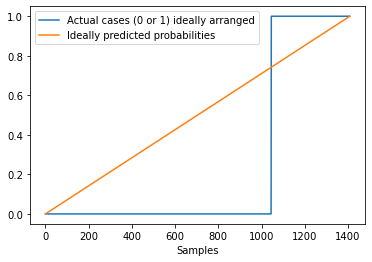

In [49]:
plt.plot(y_valid_ideal, label='Actual cases (0 or 1) ideally arranged')
plt.plot(y_valid_pred_ideal, label='Ideally predicted probabilities')
plt.legend()
plt.xlabel('Samples');

### Now compare models: {model_ideal, model, model_small, model_random}

In [50]:
model_ideal_scores = get_tpr_fpr_dataframe(y_valid_ideal, y_valid_pred_ideal)
model_scores = get_tpr_fpr_dataframe(y_valid, y_valid_pred)
model_small_scores = get_tpr_fpr_dataframe(y_valid, y_valid_pred_small)
model_random_scores = get_tpr_fpr_dataframe(y_valid, y_valid_pred_random)

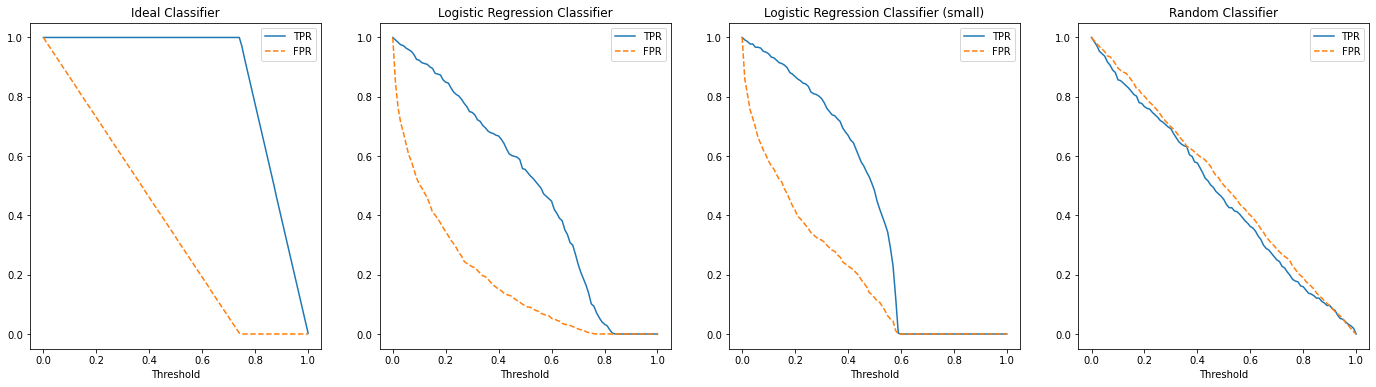

In [51]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

x = model_ideal_scores['Threshold']
y1 = model_ideal_scores['TPR']
y2 = model_ideal_scores['FPR']
ax[0].plot(x, y1, linestyle='solid', label='TPR')
ax[0].plot(x, y2, linestyle='dashed', label='FPR')
ax[0].legend()
ax[0].set_title('Ideal Classifier')
ax[0].set_xlabel('Threshold')

x = model_scores['Threshold']
y1 = model_scores['TPR']
y2 = model_scores['FPR']
ax[1].plot(x, y1, linestyle='solid', label='TPR')
ax[1].plot(x, y2, linestyle='dashed', label='FPR')
ax[1].legend()
ax[1].set_title('Logistic Regression Classifier')
ax[1].set_xlabel('Threshold')

x = model_small_scores['Threshold']
y1 = model_small_scores['TPR']
y2 = model_small_scores['FPR']
ax[2].plot(x, y1, linestyle='solid', label='TPR')
ax[2].plot(x, y2, linestyle='dashed', label='FPR')
ax[2].legend()
ax[2].set_title('Logistic Regression Classifier (small)')
ax[2].set_xlabel('Threshold')

x = model_random_scores['Threshold']
y1 = model_random_scores['TPR']
y2 = model_random_scores['FPR']
ax[3].plot(x, y1, linestyle='solid', label='TPR')
ax[3].plot(x, y2, linestyle='dashed', label='FPR')
ax[3].legend()
ax[3].set_title('Random Classifier')
ax[3].set_xlabel('Threshold')

plt.show()

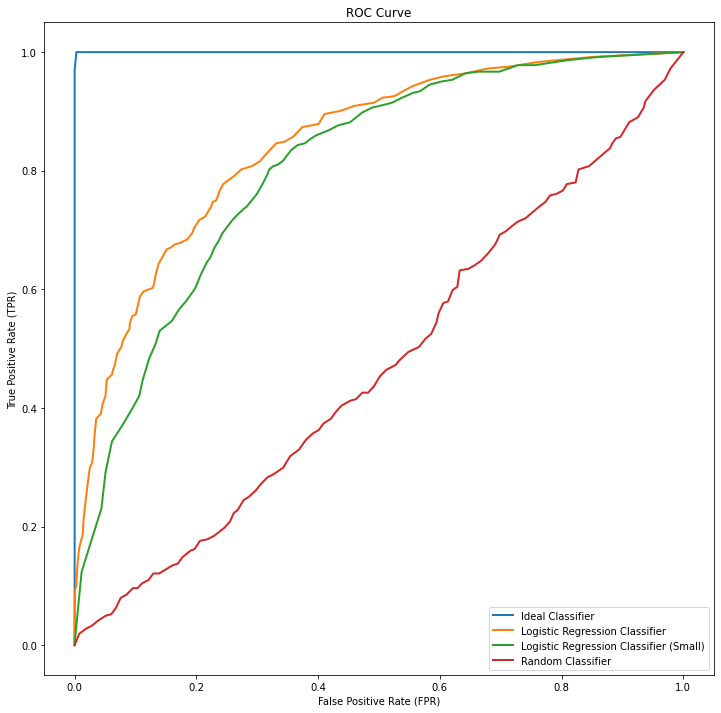

In [52]:
## ROC curve 

plt.figure(figsize=(12, 12))

x, y = model_ideal_scores['FPR'], model_ideal_scores['TPR']
plt.plot(x, y, linestyle='solid', linewidth=2, label='Ideal Classifier')

x, y = model_scores['FPR'], model_scores['TPR']
plt.plot(x, y, linestyle='solid', linewidth=2, label='Logistic Regression Classifier')

x, y = model_small_scores['FPR'], model_small_scores['TPR']
plt.plot(x, y, linestyle='solid', linewidth=2, label='Logistic Regression Classifier (Small)')

x, y = model_random_scores['FPR'], model_random_scores['TPR']
plt.plot(x, y, linestyle='solid', linewidth=2, label='Random Classifier')

plt.legend()

plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

plt.show()

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
print("Area under ROC curve (ROC_AUC Score):")
print(f"Ideal classifier:\t\t\t{roc_auc_score(y_valid_ideal, y_valid_pred_ideal):.4f}")
print(f"Logistic Regression classifier:\t\t{roc_auc_score(y_valid, y_valid_pred):.4f}")
print(f"Logistic Regression classifier (small):\t{roc_auc_score(y_valid, y_valid_pred_small):.4f}")
print(f"Random classifier:\t\t\t{roc_auc_score(y_valid, y_valid_pred_random):.4f}")

Area under ROC curve (ROC_AUC Score):
Ideal classifier:			1.0000
Logistic Regression classifier:		0.8443
Logistic Regression classifier (small):	0.8053
Random classifier:			0.4713


## 5. K-fold Cross Validation 
Find the "best" model (hyper)parameter(s) using cross-validation

Model(W; C). What is a good choice of C?

#### Example: use three-fold crross-validation to choose best C from $\left\{C[0], C[1], ... C[i], ...\right\}$
> Three-fold cross-validation:
> - Outer Loop: For each $C[i]$,
>   - Inner Loop: Three iterations (why three? Three-fold cross-validation.)
>       - Original {Train + Valid} dataset $\rightarrow$ $\boxed{\text{Fold} 1}, \boxed{\text{Fold} 2}, \boxed{\text{Fold} 3}$
>       - Iter 1: Train $\text{Model}(\vec{w}; C[i])$ on $\boxed{\text{Fold} 1}, \boxed{\text{Fold} 2}$, evaluate on $\boxed{\text{Fold} 3}$, record eval score $s_{1}$
>       - Iter 2: Train $\text{Model}(\vec{w}; C[i])$ on $\boxed{\text{Fold} 1}, \boxed{\text{Fold} 3}$, evaluate on $\boxed{\text{Fold} 2}$, record eval score $s_{2}$
>       - Iter 3: Train $\text{Model}(\vec{w}; C[i])$ on $\boxed{\text{Fold} 2}, \boxed{\text{Fold} 3}$, evaluate on $\boxed{\text{Fold} 1}$, record eval score $s_{3}$
>   - Record $\mathrm{metric(C[i])} = \mathrm{avg}(s_{1}, s_{2}, s_{3})$
> - Find which $C[i]$ gives the best performance by looking at $\left\{\mathrm{metric}(C[i]), \text{for all } i \right\}$. Call this best choice $C^{*}$.
> - Finally, re-train a model with $C^{*}$ (the best) on the full {Train + Valid} dataset. This model, $\mathrm{Model}\left(\vec{w}; C^{*}\right)$, will be $the$ (cross-)validated model ready to test/service.

Versus, if we don't do cross-validation, but a simple validation, the program would look like:
> Simplistic validation:
> - (Just one) Loop: For each $C[i]$,
>   - Train $\text{Model}(\vec{w}; C[i])$ on $\boxed{\text{Train}}$, evaluate on $\boxed{\text{Valid}}$, record eval score $s_{i}$
> - Find which $C[i]$ gives the best performance by looking at $\left\{\mathrm{metric}(C[i]), \text{for all } i \right\}$.
> - Re-train.

In [55]:
from sklearn.model_selection import KFold

In [56]:
n_folds = 5

kfold = KFold(n_splits=n_folds, shuffle=True, random_state=123)

arrayC = [0.001, 0.01, 0.1, 0.5, 1, 10]

metrics = []
for C in arrayC:
    
    curr_metrics = []

    for train_idx, valid_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        y_train = df_train['churn'].values 

        df_valid = df_train_full .iloc[valid_idx]
        y_valid = df_valid['churn'].values 

        dict_vectorizer, model = train(df_train, y_train, C=C)

        y_valid_pred = predict(df_valid, dict_vectorizer, model)

        curr_metric = roc_auc_score(y_valid, y_valid_pred)
        curr_metrics.append(curr_metric)

    metrics.append((np.mean(curr_metrics), np.std(curr_metrics)))

In [57]:
for i, C in enumerate(arrayC):
    print(f"C={C}\t auc = {metrics[i][0]:.4f} +/- {metrics[i][1]:.4f}")

C=0.001	 auc = 0.8293 +/- 0.0069
C=0.01	 auc = 0.8459 +/- 0.0050
C=0.1	 auc = 0.8472 +/- 0.0047
C=0.5	 auc = 0.8472 +/- 0.0045
C=1	 auc = 0.8471 +/- 0.0045
C=10	 auc = 0.8473 +/- 0.0047


In [58]:
CStar = 0.5

y_train_full = df_train_full['churn'].values

y_test = df_test['churn'].values

# Notice below: train with df_train_full (train +  valid), not df_train
dict_vectorizer, model = train(df_train_full, y_train_full, C=CStar)
y_train_pred_full = predict(df_train_full, dict_vectorizer, model)
y_test_pred_full = predict(df_test, dict_vectorizer, model)

auc_train_full = roc_auc_score(y_train_full, y_train_pred_full)
auc_test = roc_auc_score(y_test, y_test_pred)

print("C* Model")

print("Accuracy (P >= threshold 0.5)")
print("\tTrain:", f"{accuracy_score(y_train_full, y_train_pred_full>=0.5):.4f}"), 
print("\tTest:", f"{accuracy_score(y_test, y_test_pred>=0.5):.4f}")

print('AUC')
print("\tTrain:", f"{auc_train_full:.4f}")
print("\tTest:", f"{auc_test:.4f}")

C* Model
Accuracy (P >= threshold 0.5)
	Train: 0.8069
	Test: 0.7991
AUC
	Train: 0.8509
	Test: 0.8342


In [59]:
model_cv_train_scores = get_accuracy_precision_recall_f1_dataframe(y_train_full, y_train_pred_full, n_thresholds=101)
model_cv_test_scores = get_accuracy_precision_recall_f1_dataframe(y_test, y_test_pred_full, n_thresholds=101)

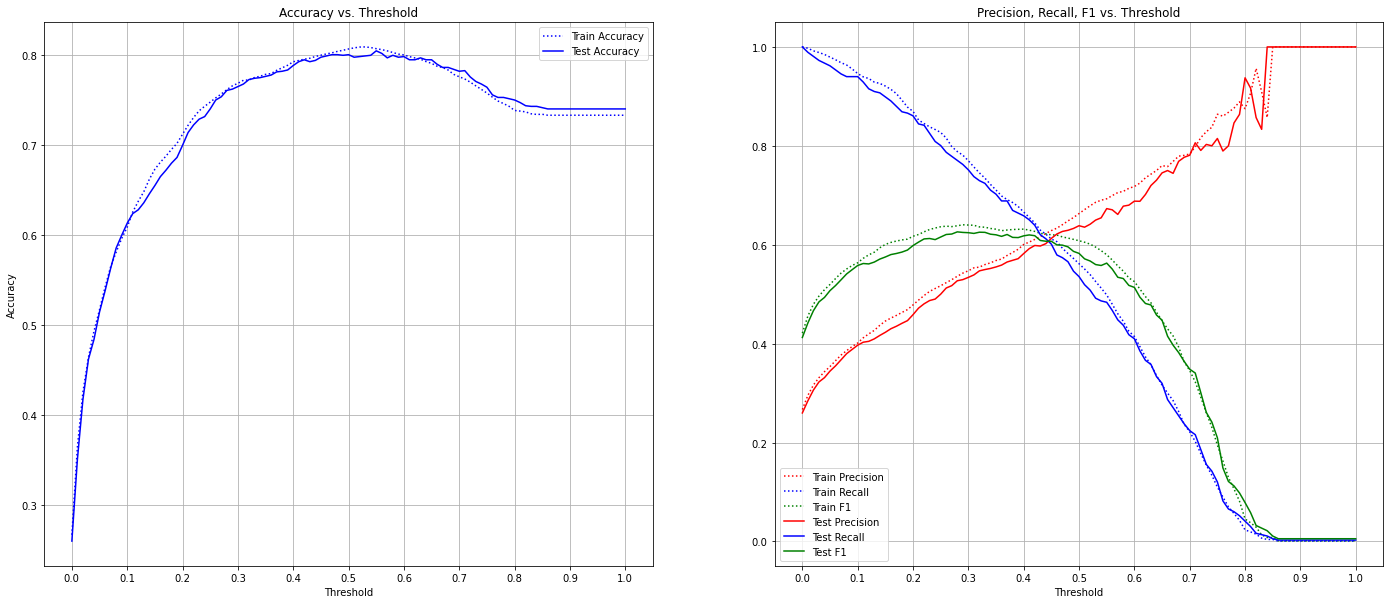

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(24, 10))

x = model_cv_train_scores['Threshold']
y = model_cv_train_scores['Accuracy']
ax[0].plot(x, y, 'b:', label='Train Accuracy')
x = model_cv_test_scores['Threshold']
y = model_cv_test_scores['Accuracy']
ax[0].plot(x, y, 'b', label='Test Accuracy')
ax[0].grid()
ax[0].legend()
ax[0].set_xticks(np.linspace(0, 1, 11))
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy vs. Threshold')

x  = model_cv_train_scores['Threshold']
y1 = model_cv_train_scores['Precision']
y2 = model_cv_train_scores['Recall']
y3 = model_cv_train_scores['F1']
ax[1].plot(x, y1, 'r:', label='Train Precision')
ax[1].plot(x, y2, 'b:', label='Train Recall')
ax[1].plot(x, y3, 'g:', label='Train F1')
x  = model_cv_test_scores['Threshold']
y1 = model_cv_test_scores['Precision']
y2 = model_cv_test_scores['Recall']
y3 = model_cv_test_scores['F1']
ax[1].plot(x, y1, 'r', label='Test Precision')
ax[1].plot(x, y2, 'b', label='Test Recall')
ax[1].plot(x, y3, 'g', label='Test F1')
ax[1].grid()
ax[1].legend()
ax[1].set_xticks(np.linspace(0, 1, 11))
ax[1].set_xlabel('Threshold')
ax[1].set_title('Precision, Recall, F1 vs. Threshold');

## Next step: Model Serving/Deploying:
- Store key artifacts: {dict_vectorizer, model}
- Containerize {cross_validate.py, train.py, predict.py}
    - Sort out system dependency issues
- Construct Webservices:
    - a backend API that calls cross_validate() and train() when model update is needed
    - a frontend API that calls predict() when prediction is needed so that prediction is easy to consume
- Host the production services
    - Not on your laptops!
- Model monitoring, maintenance
- Do the above (MLOps) on-prem, cloud-native, hybrid, etc.